In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

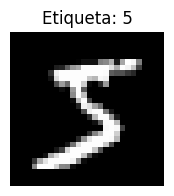

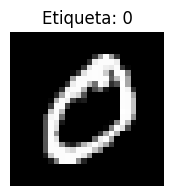

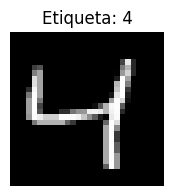

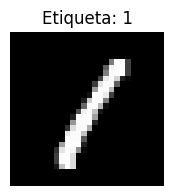

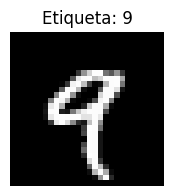

In [2]:
# Paso 2: Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualizar las primeras X imágenes del conjunto de entrenamiento
for i in range(5):
    plt.figure(figsize=(2, 2))  # Tamaño de la figura
    plt.imshow(x_train[i], cmap='gray')  # Mostrar la imagen en escala de grises
    plt.title(f"Etiqueta: {y_train[i]}")  # Título con la etiqueta de la imagen
    plt.axis('off')  # Ocultar ejes
    plt.show()

In [3]:
# Paso 3: Preprocesar los datos
x_train = x_train.astype('float32') / 255  # Normalización
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(-1, 28 * 28)     # Aplanar las imágenes
x_test = x_test.reshape(-1, 28 * 28)
y_train = tf.keras.utils.to_categorical(y_train, 10)  # One-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [4]:
# Paso 4: Definir el modelo MLP
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida

# Modelo del profe
'''model = models.Sequential()
model.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))  # Leaky ReLU
model.add(layers.Dense(250, activation='leaky_relu'))  
model.add(layers.Dense(16, activation='leaky_relu'))  
model.add(layers.Dense(16, activation='leaky_relu'))  
model.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida
'''

c:\Users\dafer\Documents\Academico\AI\BootCamp\estudio\mlp_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"model = models.Sequential()\nmodel.add(layers.Dense(784, activation='relu', input_shape=(28 * 28,)))  # Leaky ReLU\nmodel.add(layers.Dense(250, activation='leaky_relu'))  \nmodel.add(layers.Dense(16, activation='leaky_relu'))  \nmodel.add(layers.Dense(16, activation='leaky_relu'))  \nmodel.add(layers.Dense(10, activation='softmax'))  # 10 clases de salida\n"

In [5]:
# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Paso 6: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
#history graba lo que paso en cada epoca en el entrenamiento

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.8592 - loss: 0.4817 - val_accuracy: 0.9622 - val_loss: 0.1269
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9706 - loss: 0.0973 - val_accuracy: 0.9683 - val_loss: 0.1134
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.9730 - val_loss: 0.0923
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9886 - loss: 0.0369 - val_accuracy: 0.9689 - val_loss: 0.1098
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9907 - loss: 0.0295 - val_accuracy: 0.9739 - val_loss: 0.0936
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9922 - loss: 0.0234 - val_accuracy: 0.9753 - val_loss: 0.0944
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9926 - loss: 0.0219 - val_accuracy: 0.9732 - val_loss: 0.1011
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9951 - loss: 0.0146 - val_ac

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9714 - loss: 0.1151
Precisión en el conjunto de prueba: 0.975600004196167


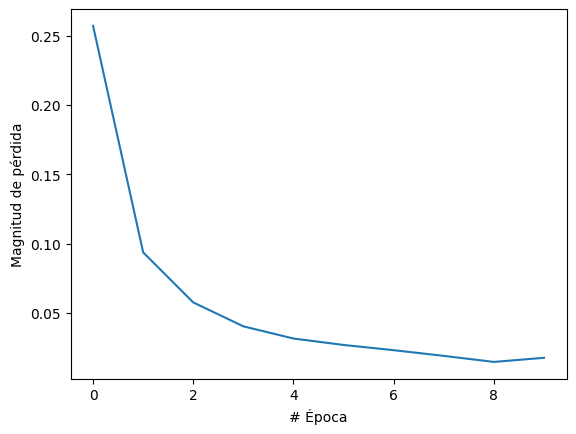

In [7]:
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')
plt.xlabel("# Época")
plt.ylabel("Magnitud de pérdida")
plt.plot(history.history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


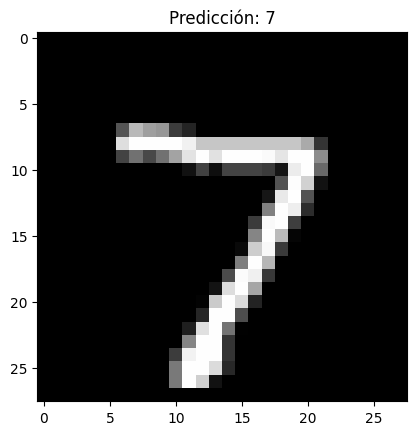

In [8]:
# Paso 8: Probar el modelo con una imagen del conjunto de prueba
imagen = x_test[0].reshape(1, 28 * 28)  # Seleccionar la primera imagen
prediccion = model.predict(imagen)
digit_predicho = np.argmax(prediccion)
# Mostrar la imagen y el dígito predicho
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f'Predicción: {digit_predicho}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Predicción para la imagen personalizada: 4


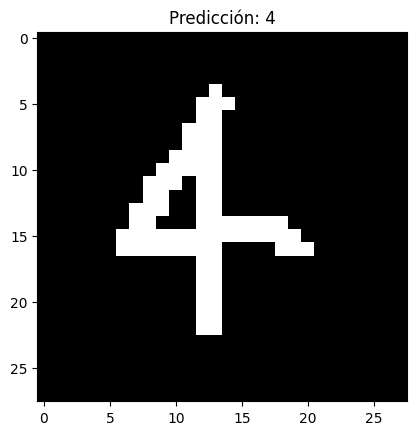

In [10]:
# Paso 9: Probar el modelo con una imagen personalizada
#ruta_imagen="D:/talento tech/ia/imagen1.png"
def predecir_imagen_personalizada(ruta_imagen):
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(1, 28 * 28).astype('float32') / 255  # Normalizar
    prediccion = model.predict(img_array)  # Hacer la predicción
    digit_predicho = np.argmax(prediccion)
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicción: {digit_predicho}')
    plt.show()
# Prueba con una imagen personalizada (comenta o descomenta según lo necesites)
predecir_imagen_personalizada('C:/Users/dafer/Documents/Academico/AI/BootCamp/estudio/prueba_4.png')